In [ ]:
import mediapipe as mp
import  cv2

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving srk.jpg to srk.jpg


In [22]:
filename = next(iter(uploaded))
img = cv2.imread(filename)


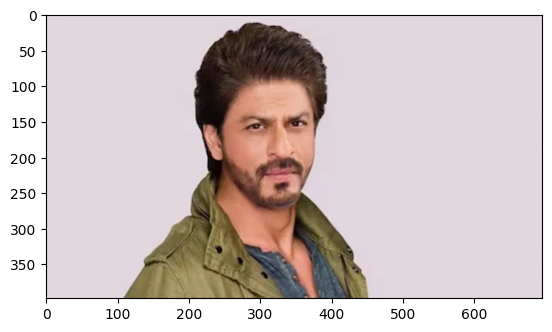

In [24]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [25]:
my_face_detection=mp.solutions.face_detection
my_drawing=mp.solutions.drawing_utils
with my_face_detection.FaceDetection(
    model_selection=1,min_detection_confidence=0.5) as face_detection :
    results=face_detection.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    annotated_image=img.copy()
    print(results.detections)

[label_id: 0
score: 0.8819456100463867
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.35333001613616943
    ymin: 0.268637090921402
    width: 0.22671812772750854
    height: 0.3965946137905121
  }
  relative_keypoints {
    x: 0.42524147033691406
    y: 0.40750840306282043
  }
  relative_keypoints {
    x: 0.5057408213615417
    y: 0.40611669421195984
  }
  relative_keypoints {
    x: 0.4837303161621094
    y: 0.5096819400787354
  }
  relative_keypoints {
    x: 0.4765166938304901
    y: 0.5749720335006714
  }
  relative_keypoints {
    x: 0.3503290116786957
    y: 0.41946491599082947
  }
  relative_keypoints {
    x: 0.5266032814979553
    y: 0.41858211159706116
  }
}
]


Person 0 

Score [0.8819456100463867] 



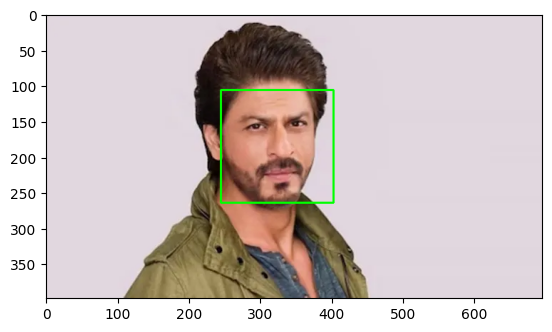

In [30]:
for i , detection in enumerate(results.detections):
  print('Person',i,'\n')
  print('Score',detection.score,'\n')
  box=detection.location_data.relative_bounding_box
  x_start,y_start=int(box.xmin*img.shape[1]) ,  int(box.ymin*img.shape[0])
  x_end,y_end=int((box.xmin+box.width)* img.shape[1]) , int((box.ymin+box.height)* img.shape[0])


  color = (0, 255, 0)  # Green color
  thickness = 2
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  # Draw the rectangle on the image
  annotated_image = cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, thickness)

  # Convert the image to RGB format (Matplotlib expects images in RGB)
  annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

  # Display the annotated image
  plt.imshow(annotated_image_rgb)

